In [113]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from wordcloud import STOPWORDS
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk import bigrams, ngrams
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT0001\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT0001\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
train = pd.read_csv(r"C:\Users\KIIT0001\Desktop\Disaster Tweets\train.csv")
test = pd.read_csv(r"C:\Users\KIIT0001\Desktop\Disaster Tweets\test.csv")
sample_sub = pd.read_csv(r"C:\Users\KIIT0001\Desktop\Disaster Tweets\sample_submission.csv")

In [3]:
print (train.shape, test.shape, sample_sub.shape)

(7613, 5) (3263, 4) (3263, 2)


In [4]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
train.duplicated().sum()

0

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_1208\4290902107.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=train, palette='viridis')


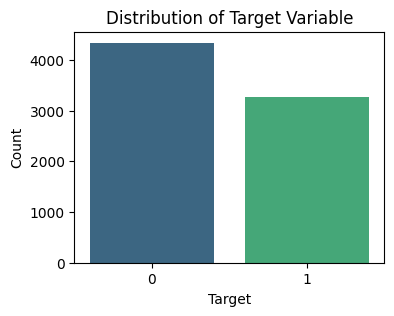

In [6]:
plt.figure(figsize=(4,3))
sns.countplot(x='target', data=train, palette='viridis')
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [7]:
train.target.value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [120]:
print("NA Data of train Data")
print(train.isnull().sum())
print("\n")
print("NA Data of test Data")
print(test.isnull().sum())

NA Data of train Data
id                0
keyword           0
location          0
text              0
target            0
clean_location    0
clean_tweet       0
clean_text        0
hashtags          0
mentions          0
dtype: int64


NA Data of test Data
id                0
keyword           0
location          0
text              0
clean_location    0
clean_tweet       0
clean_text        0
hashtags          0
mentions          0
dtype: int64


In [9]:
print (train.keyword.nunique(), test.keyword.nunique())
print (set(train.keyword.unique()) - set(test.keyword.unique()))

221 221
set()


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

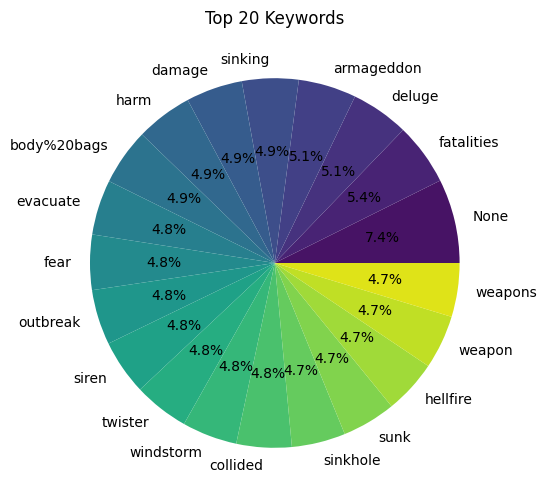

In [119]:
plt.figure(figsize=(9,6))
top_20 = train.keyword.value_counts().iloc[:20]
plt.pie(top_20, labels=top_20.index, autopct='%1.1f%%', colors=sns.color_palette("viridis", 20))
plt.title('Top 20 Keywords')
plt.show()

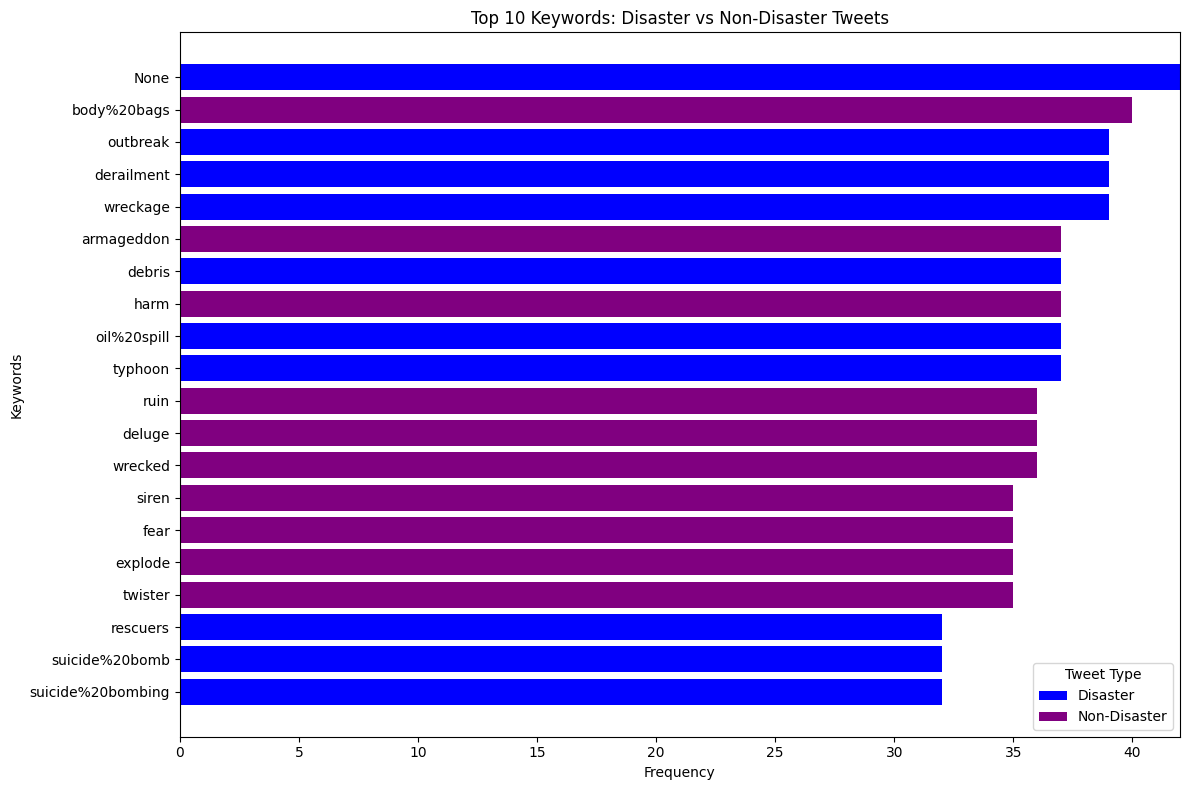

In [139]:
disasters = train[train.target == 1].keyword.value_counts().head(10)
nondisasters = train[train.target == 0].keyword.value_counts().head(10)
df_combined = pd.DataFrame({'Disaster': disasters, 'Non-Disaster': nondisasters}).fillna(0)
df_combined['Total'] = df_combined.sum(axis=1)
df_combined = df_combined.sort_values('Total', ascending=True)
plt.figure(figsize=(12, 8))
plt.barh(df_combined.index, df_combined['Disaster'], color='blue', label='Disaster')
plt.barh(df_combined.index, df_combined['Non-Disaster'], left=df_combined['Disaster'], color='purple', label='Non-Disaster')
plt.title('Top 10 Keywords: Disaster vs Non-Disaster Tweets')
plt.xlabel('Frequency')
plt.ylabel('Keywords')
plt.legend(title='Tweet Type')
plt.tight_layout()
plt.show()

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_1208\1645913929.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_d, y=top_d.index, palette='Reds_r')
C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_1208\1645913929.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_nd, y=top_nd.index, palette='Blues_r')


<Figure size 1200x800 with 0 Axes>

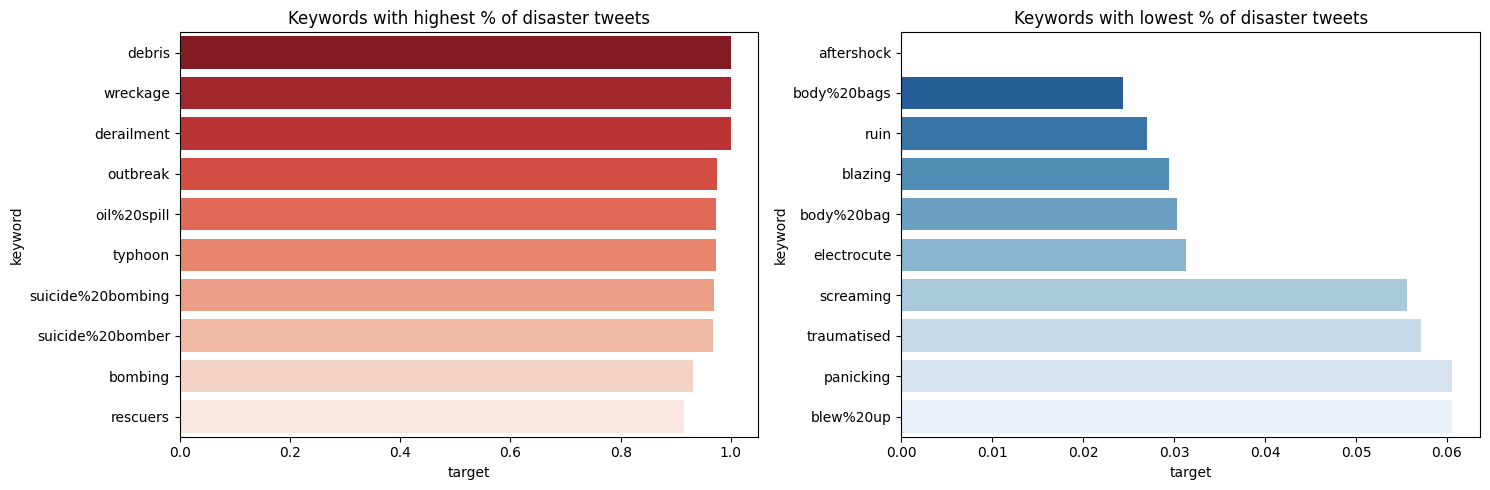

In [17]:
group_mean = train.groupby('keyword')['target'].mean()
top_d = group_mean.sort_values(ascending=False).head(10)
top_nd = group_mean.sort_values().head(10)

plt.figure(figsize=(15,5))
plt.subplot(121)
sns.barplot(x=top_d, y=top_d.index, palette='Reds_r')
plt.title('Keywords with highest % of disaster tweets')
plt.subplot(122)
sns.barplot(x=top_nd, y=top_nd.index, palette='Blues_r')
plt.title('Keywords with lowest % of disaster tweets')
plt.tight_layout()
plt.show()

In [18]:
print (train.location.nunique(), test.location.nunique())

3341 1602


C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_1208\1441225885.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_loc.index, y=top_loc.values, palette=sns.color_palette("Set2", len(top_loc)))


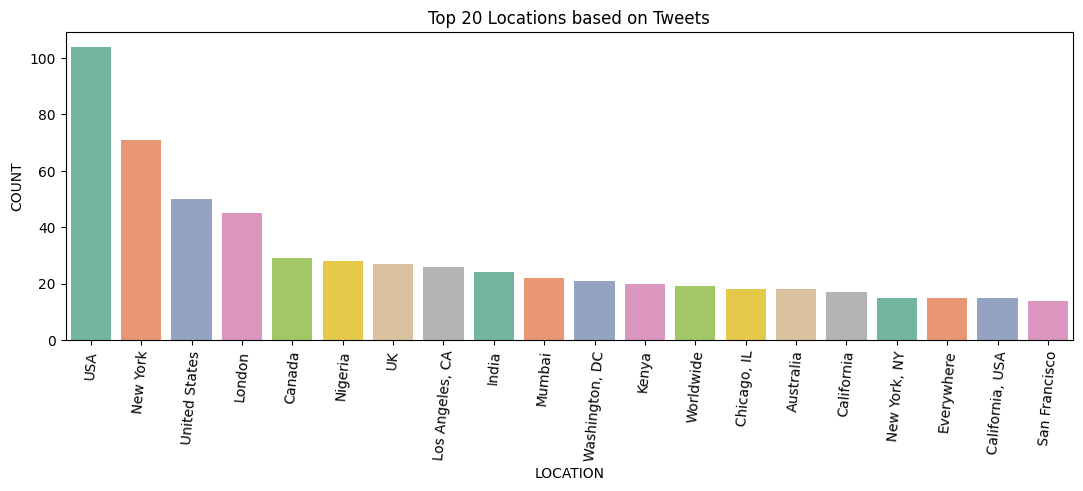

In [126]:
location_counts = train.location.value_counts()
location_counts = location_counts[location_counts.index != 'None']
top_loc = location_counts.iloc[:20]
plt.figure(figsize=(13, 4))
sns.barplot(x=top_loc.index, y=top_loc.values, palette=sns.color_palette("Set2", len(top_loc)))
plt.title('Top 20 Locations based on Tweets')
plt.xlabel('LOCATION')
plt.ylabel('COUNT')
plt.xticks(rotation=85) 
plt.show()

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_1208\216061381.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loc_dis.index, y=loc_dis, palette='viridis')


<Figure size 1200x800 with 0 Axes>

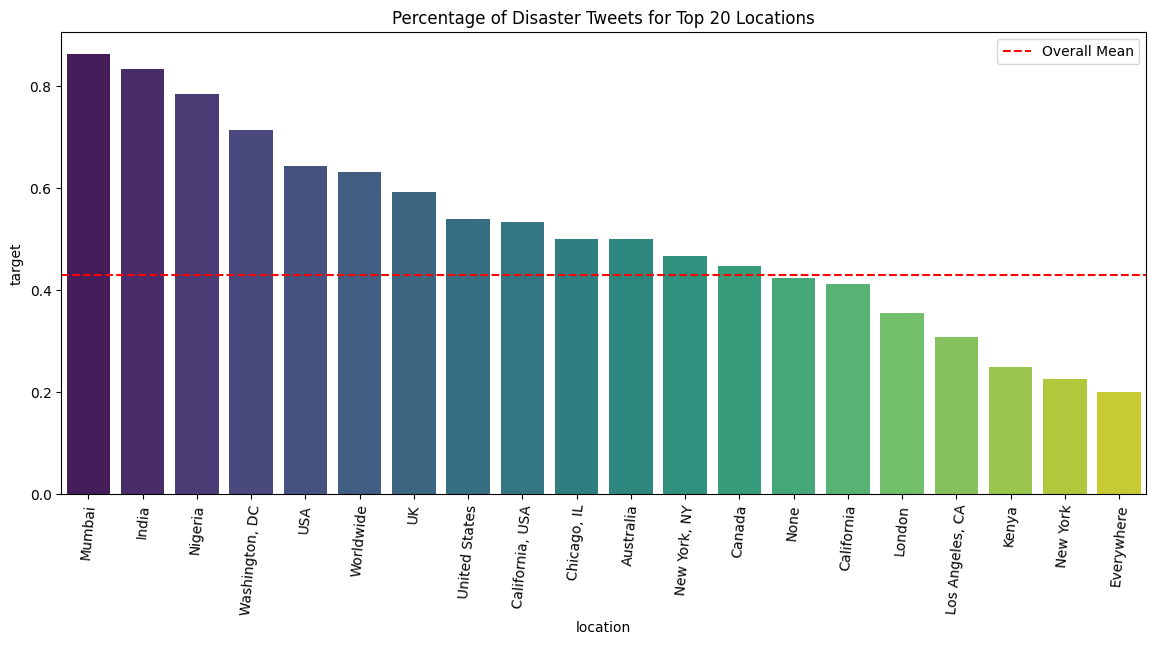

In [122]:
top_loc = list(train.location.value_counts().iloc[:20].index)
top_loc_tweets = train[train.location.isin(top_loc)]

groupMean = top_loc_tweets.groupby('location')['target'].mean()
loc_dis = groupMean.sort_values(ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x=loc_dis.index, y=loc_dis, palette='viridis')
plt.title('Percentage of Disaster Tweets for Top 20 Locations')
plt.xticks(rotation=85)
plt.axhline(np.mean(train['target']), color='red', linestyle='--', label='Overall Mean')
plt.legend()
plt.show()

In [21]:
for col in ['keyword','location']:
    train[col] = train[col].fillna('None')
    test[col] = test[col].fillna('None')

In [22]:
def clean_location(x):
    if x == 'None':
        return 'None'
    elif x == 'Earth' or x =='Worldwide' or x == 'Everywhere':
        return 'World'
    elif 'New York' in x or 'NYC' in x:
        return 'New York'    
    elif 'London' in x:
        return 'London'
    elif 'Mumbai' in x:
        return 'Mumbai'
    elif 'Washington' in x and 'D' in x and 'C' in x:
        return 'Washington DC'
    elif 'San Francisco' in x:
        return 'San Francisco'
    elif 'Los Angeles' in x:
        return 'Los Angeles'
    elif 'Seattle' in x:
        return 'Seattle'
    elif 'Chicago' in x:
        return 'Chicago'
    elif 'Toronto' in x:
        return 'Toronto'
    elif 'Sacramento' in x:
        return 'Sacramento'
    elif 'Atlanta' in x:
        return 'Atlanta'
    elif 'California' in x:
        return 'California'
    elif 'Florida' in x:
        return 'Florida'
    elif 'Texas' in x:
        return 'Texas'
    elif 'United States' in x or 'USA' in x:
        return 'USA'
    elif 'United Kingdom' in x or 'UK' in x or 'Britain' in x:
        return 'UK'
    elif 'Canada' in x:
        return 'Canada'
    elif 'India' in x:
        return 'India'
    elif 'Kenya' in x:
        return 'Kenya'
    elif 'Nigeria' in x:
        return 'Nigeria'
    elif 'Australia' in x:
        return 'Australia'
    elif 'Indonesia' in x:
        return 'Indonesia'
    elif x in top_loc:
        return x
    else: 
        return 'Others'

In [23]:
train['clean_location'] = train['location'].apply(lambda x: clean_location(str(x)))
test['clean_location'] = test['location'].apply(lambda x: clean_location(str(x)))

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_1208\1010089154.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_loc_tweets2.index, y=top_loc_tweets2, palette="viridis")


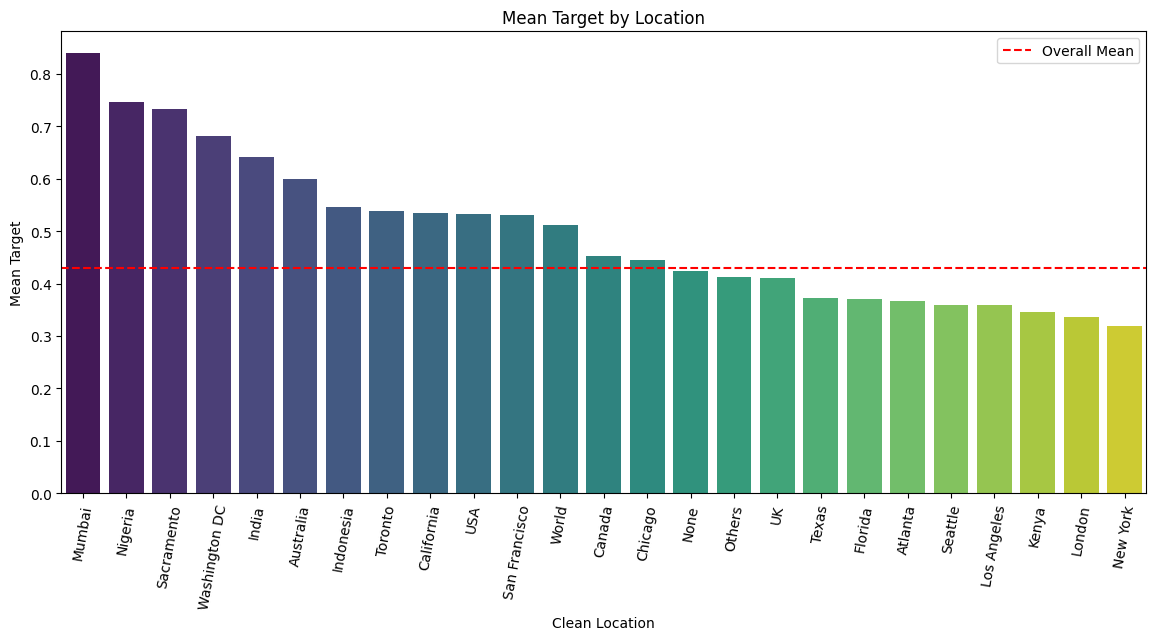

In [123]:
groupmean = train.groupby('clean_location')['target'].mean()
top_loc_tweets2 = groupmean.sort_values(ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x=top_loc_tweets2.index, y=top_loc_tweets2, palette="viridis")
plt.axhline(np.mean(train['target']), color='red', linestyle='--', label='Overall Mean')
plt.xlabel('Clean Location')
plt.ylabel('Mean Target')
plt.title('Mean Target by Location')
plt.xticks(rotation=80)
plt.legend()
plt.show()

In [25]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text) 
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#','', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

train['clean_tweet'] = train['text'].apply(preprocess_text)
test['clean_tweet'] = test['text'].apply(preprocess_text)

In [26]:
train.head()

,id,keyword,location,text,target,clean_location,clean_tweet
0,1,None,None,Our Deeds are the Reason of this #earthquake M...,1,None,our deeds are the reason of this earthquake ma...
1,4,None,None,Forest fire near La Ronge Sask. Canada,1,None,forest fire near la ronge sask canada
2,5,None,None,All residents asked to 'shelter in place' are ...,1,None,all residents asked to shelter in place are be...
3,6,None,None,"13,000 people receive #wildfires evacuation or...",1,None,13000 people receive wildfires evacuation orde...
4,7,None,None,Just got sent this photo from Ruby #Alaska as ...,1,None,just got sent this photo from ruby alaska as s...


In [27]:
test.head()

,id,keyword,location,text,clean_location,clean_tweet
0,0,None,None,Just happened a terrible car crash,None,just happened a terrible car crash
1,2,None,None,"Heard about #earthquake is different cities, s...",None,heard about earthquake is different cities sta...
2,3,None,None,"there is a forest fire at spot pond, geese are...",None,there is a forest fire at spot pond geese are ...
3,9,None,None,Apocalypse lighting. #Spokane #wildfires,None,apocalypse lighting spokane wildfires
4,11,None,None,Typhoon Soudelor kills 28 in China and Taiwan,None,typhoon soudelor kills 28 in china and taiwan


In [28]:
from nltk import FreqDist, word_tokenize
stop_words = set(STOPWORDS)

In [29]:
train['clean_tweet'].isnull().sum()

0

In [30]:
all_text = ' '.join(train['clean_tweet']).lower()
tokens = word_tokenize(all_text)

In [31]:
stop_words = set(stopwords.words('english'))

In [32]:
filtered_tokens = [w for w in tokens if w.isalpha() and w not in stop_words]

In [124]:
word_freq = FreqDist(filtered_tokens)
df_word_freq = pd.DataFrame(list(word_freq.items()), columns=['word', 'count'])
top20words = df_word_freq.sort_values('count', ascending=False).head(20)
print(top20words)

           word  count
128        like    345
56           im    299
316         amp    298
8          fire    250
224         get    229
158         new    224
723         via    220
23       people    196
692        news    193
580         one    193
339        dont    191
1272      video    165
6            us    164
62    emergency    157
45     disaster    152
178      police    140
311       would    131
523       still    129
907        body    124
27          got    123


C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_1208\3592328519.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top20words['word'], y=top20words['count'], palette=palette)


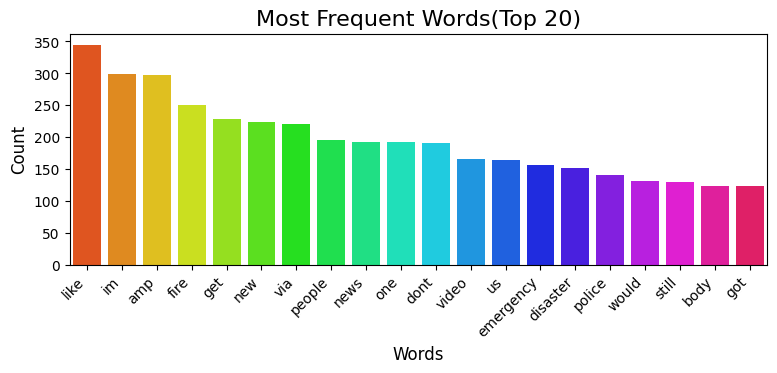

In [125]:
palette = sns.color_palette("hsv", len(top20words))
plt.figure(figsize=(9, 3))
sns.barplot(x=top20words['word'], y=top20words['count'], palette=palette)
plt.title("Most Frequent Words(Top 20)", fontsize=16)
plt.xlabel("Words", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_1208\1234688691.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top20_disasters['count'], y=top20_disasters.index, palette='coolwarm')
C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_1208\1234688691.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top20_nondisasters['count'], y=top20_nondisasters.index, palette='viridis')


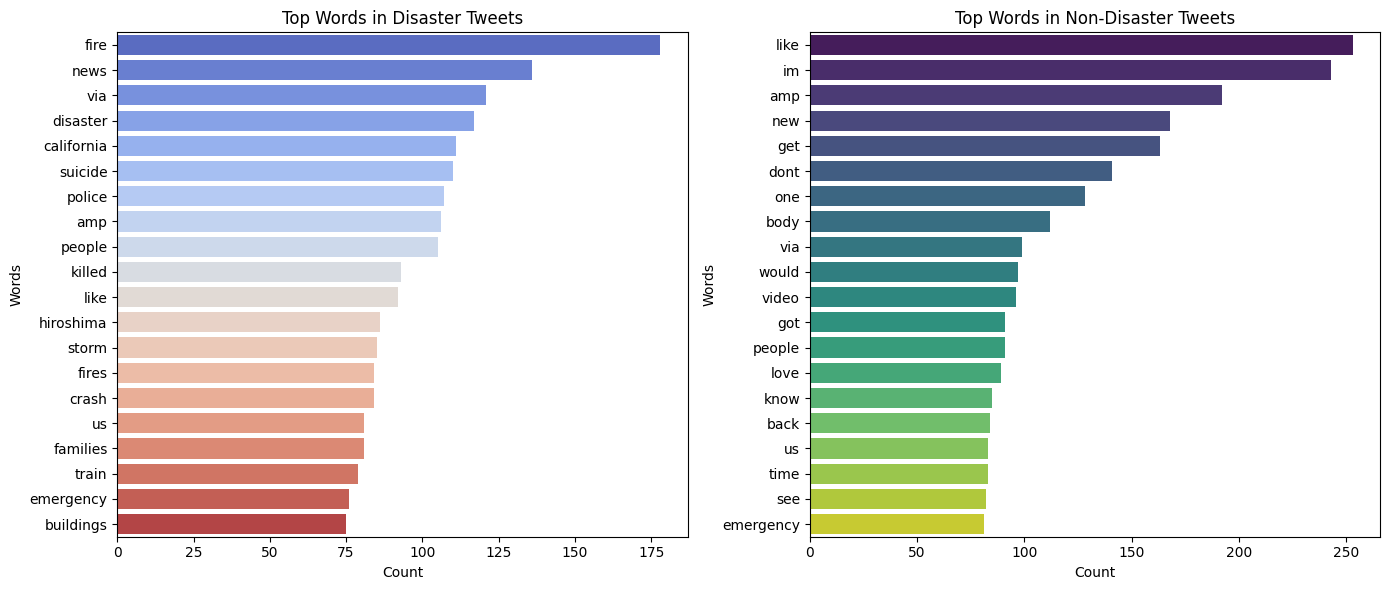

In [110]:
plt.figure(figsize=(14, 6))

plt.subplot(121)
text_disaster = ' '.join(train.loc[train.target == 1, 'clean_tweet']).lower()
tokens_disaster = word_tokenize(text_disaster)
filtered_tokens1 = [w for w in tokens_disaster if w.isalpha() and w not in stop_words]
freq_disaster = FreqDist(filtered_tokens1)
df_freq_disaster = pd.DataFrame.from_dict(freq_disaster, orient='index', columns=['count'])
top20_disasters = df_freq_disaster.sort_values('count', ascending=False).head(20)
sns.barplot(x=top20_disasters['count'], y=top20_disasters.index, palette='coolwarm')
plt.title('Top Words in Disaster Tweets')
plt.xlabel('Count')
plt.ylabel('Words')

plt.subplot(122)
text_nondisaster = ' '.join(train.loc[train.target == 0, 'clean_tweet']).lower()
tokens_nondisaster = word_tokenize(text_nondisaster)
filtered_tokens2 = [w for w in tokens_nondisaster if w.isalpha() and w not in stop_words]
freq_nondisaster = FreqDist(filtered_tokens2)
df_nondisasters = pd.DataFrame.from_dict(freq_nondisaster, orient='index', columns=['count'])
top20_nondisasters = df_nondisasters.sort_values('count', ascending=False).head(20)
sns.barplot(x=top20_nondisasters['count'], y=top20_nondisasters.index, palette='viridis')
plt.title('Top Words in Non-Disaster Tweets')
plt.xlabel('Count')
plt.ylabel('Words')

plt.tight_layout()
plt.show()

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_1208\2049586435.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top20_disasters['count'], y=top20_disasters.index.map(lambda x: ' '.join(x)), palette='coolwarm')
C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_1208\2049586435.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top20_nondisasters['count'], y=top20_nondisasters.index.map(lambda x: ' '.join(x)), palette='viridis')


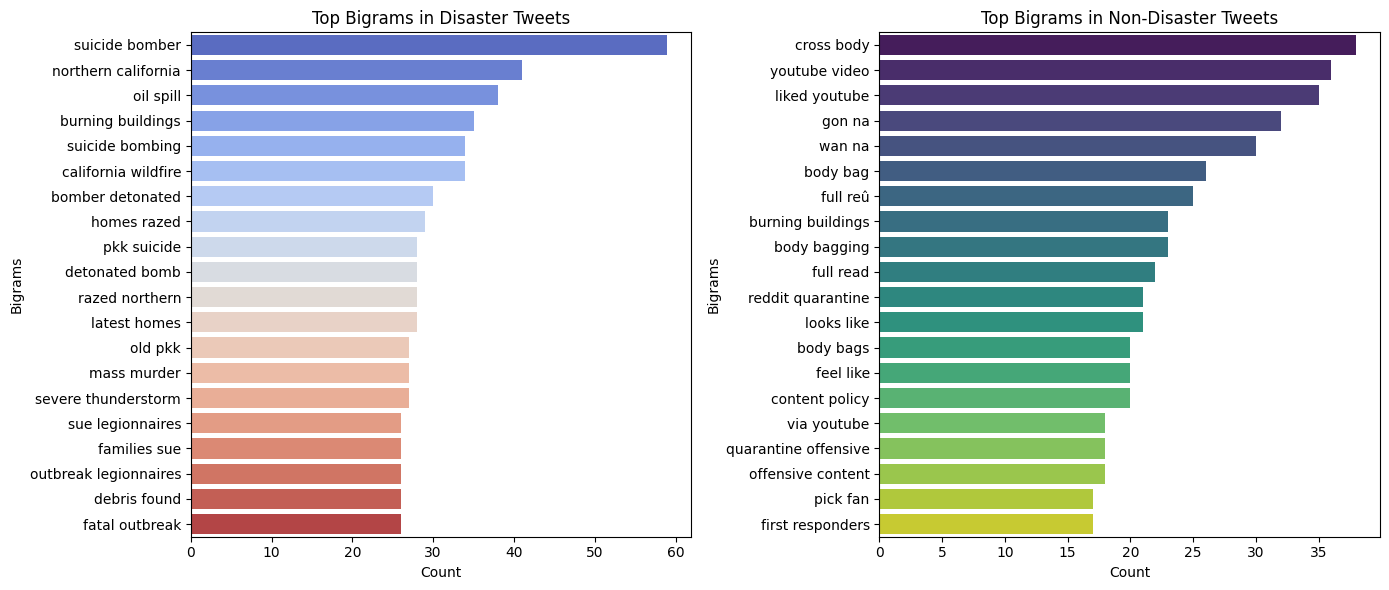

In [112]:
plt.figure(figsize=(14, 6))

plt.subplot(121)
text_disaster = ' '.join(train.loc[train.target == 1, 'clean_tweet']).lower()
tokens_disaster = word_tokenize(text_disaster)
filtered_tokens1 = [w for w in tokens_disaster if w.isalpha() and w not in stop_words]
bigrams_disaster = list(bigrams(filtered_tokens1))
freq_disaster = FreqDist(bigrams_disaster)
df_freq_disaster = pd.DataFrame.from_dict(freq_disaster, orient='index', columns=['count'])
top20_disasters = df_freq_disaster.sort_values('count', ascending=False).head(20)
sns.barplot(x=top20_disasters['count'], y=top20_disasters.index.map(lambda x: ' '.join(x)), palette='coolwarm')
plt.title('Top Bigrams in Disaster Tweets')
plt.xlabel('Count')
plt.ylabel('Bigrams')

plt.subplot(122)
text_nondisaster = ' '.join(train.loc[train.target == 0, 'clean_tweet']).lower()
tokens_nondisaster = word_tokenize(text_nondisaster)
filtered_tokens2 = [w for w in tokens_nondisaster if w.isalpha() and w not in stop_words]
bigrams_nondisaster = list(bigrams(filtered_tokens2))
freq_nondisaster = FreqDist(bigrams_nondisaster)
df_nondisasters = pd.DataFrame.from_dict(freq_nondisaster, orient='index', columns=['count'])
top20_nondisasters = df_nondisasters.sort_values('count', ascending=False).head(20)
sns.barplot(x=top20_nondisasters['count'], y=top20_nondisasters.index.map(lambda x: ' '.join(x)), palette='viridis')
plt.title('Top Bigrams in Non-Disaster Tweets')
plt.xlabel('Count')
plt.ylabel('Bigrams')

plt.tight_layout()
plt.show()

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_1208\3693523572.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top20_disasters['count'], y=top20_disasters.index, palette='coolwarm')
C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_1208\3693523572.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top20_nondisasters['count'], y=top20_nondisasters.index, palette='viridis')


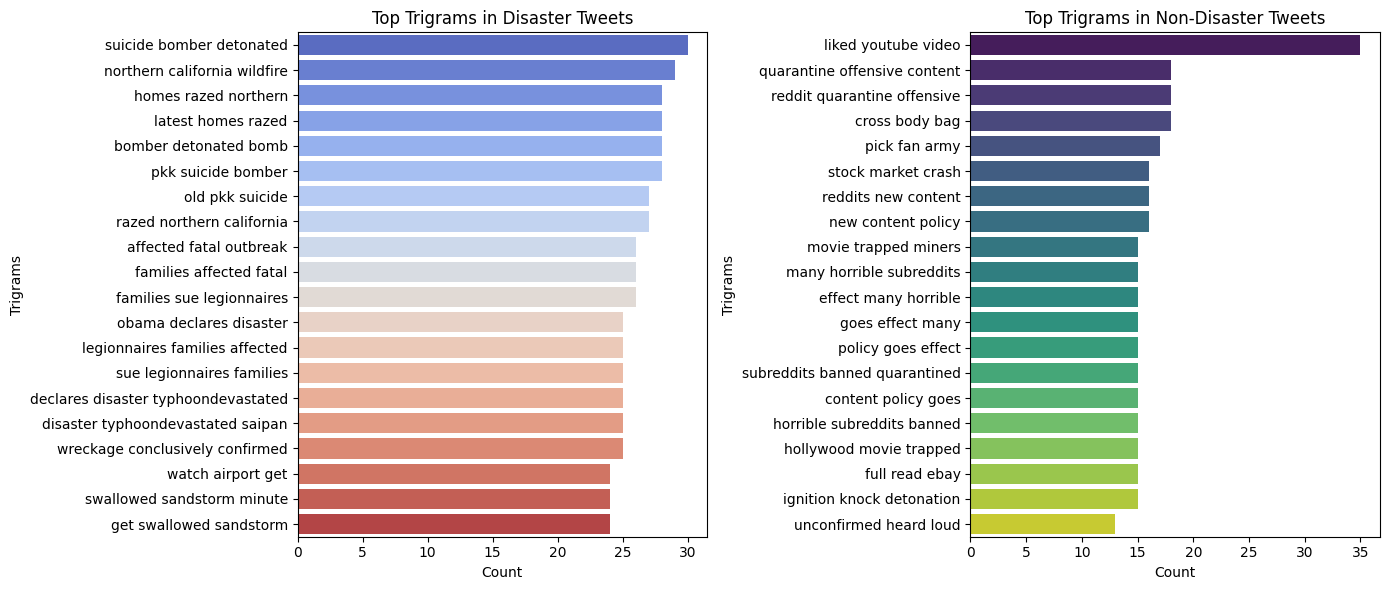

In [114]:
def generate_trigrams(text):
    tokens = word_tokenize(text)
    filtered_tokens = [w for w in tokens if w.isalpha() and w not in stop_words]
    trigrams = ngrams(filtered_tokens, 3)
    return [' '.join(gram) for gram in trigrams]

plt.figure(figsize=(14, 6))

plt.subplot(121)
text_disaster = ' '.join(train.loc[train.target == 1, 'clean_tweet']).lower()
disaster_trigrams = generate_trigrams(text_disaster)
freq_disaster = FreqDist(disaster_trigrams)
df_freq_disaster = pd.DataFrame.from_dict(freq_disaster, orient='index', columns=['count'])
top20_disasters = df_freq_disaster.sort_values('count', ascending=False).head(20)
sns.barplot(x=top20_disasters['count'], y=top20_disasters.index, palette='coolwarm')
plt.title('Top Trigrams in Disaster Tweets')
plt.xlabel('Count')
plt.ylabel('Trigrams')

plt.subplot(122)
text_nondisaster = ' '.join(train.loc[train.target == 0, 'clean_tweet']).lower()
nondisaster_trigrams = generate_trigrams(text_nondisaster)
freq_nondisaster = FreqDist(nondisaster_trigrams)
df_nondisasters = pd.DataFrame.from_dict(freq_nondisaster, orient='index', columns=['count'])
top20_nondisasters = df_nondisasters.sort_values('count', ascending=False).head(20)
sns.barplot(x=top20_nondisasters['count'], y=top20_nondisasters.index, palette='viridis')
plt.title('Top Trigrams in Non-Disaster Tweets')
plt.xlabel('Count')
plt.ylabel('Trigrams')

plt.tight_layout()
plt.show()